Un cercetător doreşte să studieze factorii care influenţează preţul apartamentelor într-un oraş. El a colectat date
despre următoarele variabile pentru 100 de apartamente:
● preţul apartamentului (variabila dependentă 𝑦, exprimată în mii de euro);
● suprafaţa utilă (variabila independentă 𝑥1, exprimată în metri pătraţi);
● numărul de camere (variabila independentă 𝑥2);
● distanţa faţă de centrul oraşului (variabila independentă 𝑥3, exprimată în kilometri).
Cercetătorul doreşte să construiască un model de regresie liniară multiplă care să estimeze preţul apartamentelor pe
baza celor trei variabile independente.
a) Realizaţi în PyMC un astfel de model, folosind setul de date din fişierul real_estate_data.csv.
b) Pe baza rezultatelor obţinute, ce factori credeţi că influenţează mai mult preţul apartamentelor?


Output()

Output()

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  33.189  2.407  28.953   37.798      0.085    0.060     803.0    1230.0   
beta1   2.482  0.018   2.449    2.514      0.001    0.000     976.0    1090.0   
beta2   9.446  0.456   8.582   10.252      0.012    0.009    1347.0    1216.0   
beta3  -3.015  0.194  -3.363   -2.646      0.006    0.004    1192.0    1263.0   

       r_hat  
alpha    1.0  
beta1    1.0  
beta2    1.0  
beta3    1.0  


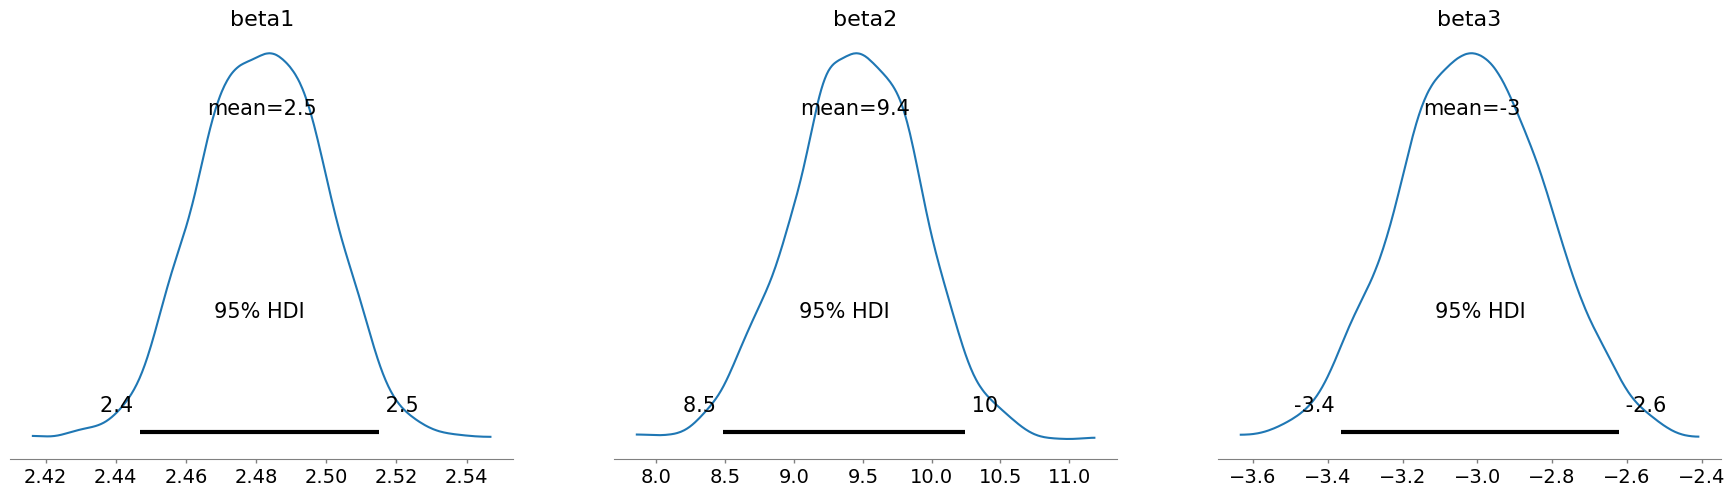

In [26]:
import pymc as pm
import arviz as az
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


data = pd.read_csv('real_estate_data.csv')

area = np.array(data['Surface_area'])
rooms = np.array(data["Rooms"])
dist = np.array(data["Distance_to_center"])
price = np.array(data["Price"])

area_mean = area.mean()
rooms_mean = rooms.mean()
dist_mean = dist.mean()

area_std = area.std()
rooms_std = rooms.std()
dist_std = dist.std()

# standardizare: (X - X.mean()) / X.std()

with pm.Model() as mlr:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    beta3 = pm.Normal('beta3', mu=0, sigma=10)

    eps = pm.HalfCauchy('eps', 5)

    mu = pm.Deterministic('mu', alpha + beta1 * area + beta2 * rooms + beta3 * dist)
    y_pred = pm.StudentT('y_pred', mu=mu, sigma=eps, nu=20, observed=price)

    trace = pm.sample(1000, tune=500, return_inferencedata=True)

summary = az.summary(trace, var_names=["alpha", "beta1", "beta2", "beta3"])
print(summary)
az.plot_posterior(trace, var_names=['beta1', 'beta2', 'beta3'], hdi_prob=0.95)
plt.show()

<Axes: title={'center': 'x'}>

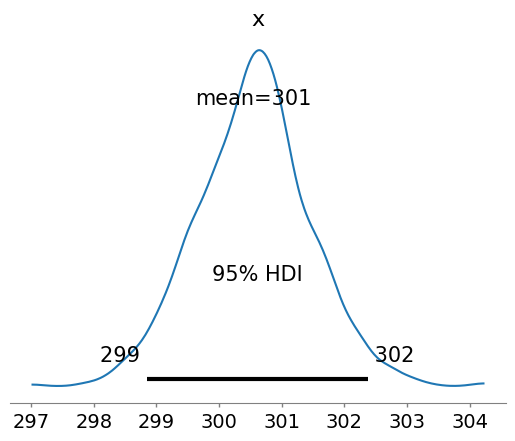

In [32]:
x1_p = 110
x2_p = 1
x3_p = 5

posterior = trace.posterior.stack(sample=("chain", "draw"))
alpha_p = posterior["alpha"].values.flatten()
beta1_p = posterior["beta1"].values.flatten()
beta2_p = posterior["beta2"].values.flatten()
beta3_p = posterior["beta3"].values.flatten()

y_pred_p = alpha_p + beta1_p * x1_p + beta2_p * x2_p + beta3_p * x3_p
az.plot_posterior(y_pred_p, hdi_prob=0.95)